In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import math
import scipy.stats as stats
import pickle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from matplotlib import colors

In [4]:
df = pd.read_csv('dataset2.csv')
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [5]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [6]:
df.shape

(4250, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [8]:
df.nunique()

state                              51
account_length                    215
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1843
total_day_calls                   120
total_day_charge                 1843
total_eve_minutes                1773
total_eve_calls                   123
total_eve_charge                 1572
total_night_minutes              1757
total_night_calls                 128
total_night_charge                992
total_intl_minutes                168
total_intl_calls                   21
total_intl_charge                 168
number_customer_service_calls      10
churn                               2
dtype: int64

In [9]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [10]:
cat_var = [ feature for feature in df.columns if df[feature].dtypes=='O']
print('List of categorical variables {}'.format(cat_var))

List of categorical variables ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


In [11]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [12]:
df = df.drop('churn',axis=1)

In [13]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df

In [15]:
df = FunLabelEncoder(df)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   int32  
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   int32  
 3   international_plan             4250 non-null   int32  
 4   voice_mail_plan                4250 non-null   int32  
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,26,83,1,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0
4246,49,73,0,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3
4247,27,75,0,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1
4248,11,50,0,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2


In [16]:
data = df
data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,26,83,1,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0
4246,49,73,0,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3
4247,27,75,0,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1
4248,11,50,0,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2


In [17]:
data = data.apply(preprocessing.LabelEncoder().fit_transform) 

In [18]:
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,35,106,1,0,1,20,737,86,737,832,64,740,1378,65,732,116,3,116,1
1,31,136,1,0,0,0,1483,77,1483,195,71,185,513,66,319,101,5,101,0
2,35,83,0,1,0,0,1788,34,1788,18,49,18,842,51,473,45,7,45,2
3,36,74,1,1,0,0,784,76,784,393,83,359,744,83,428,80,3,80,3
4,19,120,2,0,1,18,1261,51,1261,1768,69,1567,991,80,544,54,7,54,3


In [19]:
data.shape

(4250, 19)

In [20]:
init_data = data
init_data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,35,106,1,0,1,20,737,86,737,832,64,740,1378,65,732,116,3,116,1
1,31,136,1,0,0,0,1483,77,1483,195,71,185,513,66,319,101,5,101,0
2,35,83,0,1,0,0,1788,34,1788,18,49,18,842,51,473,45,7,45,2
3,36,74,1,1,0,0,784,76,784,393,83,359,744,83,428,80,3,80,3
4,19,120,2,0,1,18,1261,51,1261,1768,69,1567,991,80,544,54,7,54,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,26,82,1,0,0,0,981,33,981,1293,49,1137,1002,41,549,82,6,82,0
4246,49,72,0,0,0,0,883,52,883,259,43,243,737,51,425,94,6,94,3
4247,27,74,0,0,0,0,821,64,821,810,87,720,235,66,173,48,7,48,1
4248,11,49,0,0,1,34,1418,90,1418,1099,87,969,1656,78,903,78,5,78,2


In [21]:
ds = data
scaler = StandardScaler()
ds = pd.DataFrame(scaler.fit_transform(ds), columns=data.columns)

In [22]:
ds

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.603081,0.172444,0.009943,-0.320547,1.679864,1.272827,-0.386157,1.170641,-0.386157,-0.113211,0.141913,-0.110085,1.179064,0.157285,1.130766,1.266256,-0.579164,1.266256,-0.426346
1,0.332212,0.931255,0.009943,-0.320547,-0.595286,-0.554002,1.275476,0.714199,1.275476,-1.601622,0.495152,-1.603208,-0.849708,0.207248,-0.799033,0.712864,0.232927,0.712864,-1.188960
2,0.603081,-0.409312,-1.398717,3.119667,-0.595286,-0.554002,1.954830,-1.466583,1.954830,-2.015200,-0.615028,-2.052490,-0.078071,-0.542202,-0.079447,-1.353132,1.045017,-1.353132,0.336268
3,0.670798,-0.636955,0.009943,3.119667,-0.595286,-0.554002,-0.281470,0.663483,-0.281470,-1.138976,1.100705,-1.135094,-0.307920,1.056625,-0.289715,-0.061884,-0.579164,-0.061884,1.098882
4,-0.480393,0.526556,1.418604,-0.320547,1.679864,1.090144,0.780995,-0.604414,0.780995,2.073842,0.394227,2.114803,0.271394,0.906735,0.252310,-1.021097,1.045017,-1.021097,1.098882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,-0.006373,-0.434606,0.009943,-0.320547,-0.595286,-0.554002,0.157326,-1.517299,0.157326,0.963959,-0.615028,0.957969,0.297193,-1.041836,0.275673,0.011901,0.638972,0.011901,-1.188960
4246,1.551121,-0.687543,-1.398717,-0.320547,-0.595286,-0.554002,-0.060958,-0.553698,-0.060958,-1.452080,-0.917805,-1.447170,-0.324338,-0.542202,-0.303733,0.454615,0.638972,0.454615,1.098882
4247,0.061344,-0.636955,-1.398717,-0.320547,-0.595286,-0.554002,-0.199056,0.054892,-0.199056,-0.164616,1.302557,-0.163891,-1.501730,0.207248,-1.481237,-1.242454,1.045017,-1.242454,-0.426346
4248,-1.022130,-1.269298,-1.398717,-0.320547,1.679864,2.551608,1.130696,1.373505,1.130696,0.510660,1.302557,0.505996,1.831086,0.806808,1.929786,-0.135670,0.232927,-0.135670,0.336268


In [23]:
seg_X = ds

In [24]:
seg_X

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.603081,0.172444,0.009943,-0.320547,1.679864,1.272827,-0.386157,1.170641,-0.386157,-0.113211,0.141913,-0.110085,1.179064,0.157285,1.130766,1.266256,-0.579164,1.266256,-0.426346
1,0.332212,0.931255,0.009943,-0.320547,-0.595286,-0.554002,1.275476,0.714199,1.275476,-1.601622,0.495152,-1.603208,-0.849708,0.207248,-0.799033,0.712864,0.232927,0.712864,-1.188960
2,0.603081,-0.409312,-1.398717,3.119667,-0.595286,-0.554002,1.954830,-1.466583,1.954830,-2.015200,-0.615028,-2.052490,-0.078071,-0.542202,-0.079447,-1.353132,1.045017,-1.353132,0.336268
3,0.670798,-0.636955,0.009943,3.119667,-0.595286,-0.554002,-0.281470,0.663483,-0.281470,-1.138976,1.100705,-1.135094,-0.307920,1.056625,-0.289715,-0.061884,-0.579164,-0.061884,1.098882
4,-0.480393,0.526556,1.418604,-0.320547,1.679864,1.090144,0.780995,-0.604414,0.780995,2.073842,0.394227,2.114803,0.271394,0.906735,0.252310,-1.021097,1.045017,-1.021097,1.098882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,-0.006373,-0.434606,0.009943,-0.320547,-0.595286,-0.554002,0.157326,-1.517299,0.157326,0.963959,-0.615028,0.957969,0.297193,-1.041836,0.275673,0.011901,0.638972,0.011901,-1.188960
4246,1.551121,-0.687543,-1.398717,-0.320547,-0.595286,-0.554002,-0.060958,-0.553698,-0.060958,-1.452080,-0.917805,-1.447170,-0.324338,-0.542202,-0.303733,0.454615,0.638972,0.454615,1.098882
4247,0.061344,-0.636955,-1.398717,-0.320547,-0.595286,-0.554002,-0.199056,0.054892,-0.199056,-0.164616,1.302557,-0.163891,-1.501730,0.207248,-1.481237,-1.242454,1.045017,-1.242454,-0.426346
4248,-1.022130,-1.269298,-1.398717,-0.320547,1.679864,2.551608,1.130696,1.373505,1.130696,0.510660,1.302557,0.505996,1.831086,0.806808,1.929786,-0.135670,0.232927,-0.135670,0.336268


In [25]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
    km = KMeans(i)
    km.fit(seg_X)
    wcss.append(km.inertia_)
np.array(wcss)

array([80750.        , 72807.48583267, 68344.45571555, 65379.22742548,
       62647.63877761, 60508.57097877, 58894.97638763, 57577.06201811,
       56583.72897095, 55570.42865757, 54659.04010913, 53784.74506106,
       53119.66022449, 52635.92567967])

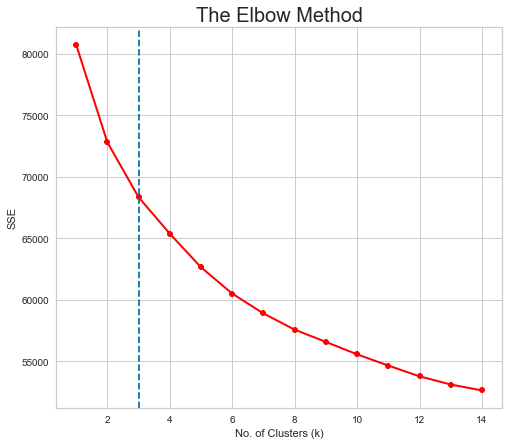

In [26]:
fig, ax = plt.subplots(figsize=(8,7))
ax = plt.plot(range(1,15),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('SSE')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

In [27]:
from sklearn.metrics import silhouette_score
sil=[]
for i in range(2,10):
    km = KMeans(n_clusters = i)
    km.fit_predict(seg_X)
    score = silhouette_score(seg_X,km.labels_)
    sil.append(score)
np.array(sil)

array([0.12717303, 0.08357769, 0.07298928, 0.07382293, 0.0703147 ,
       0.06753121, 0.06781842, 0.06433423])

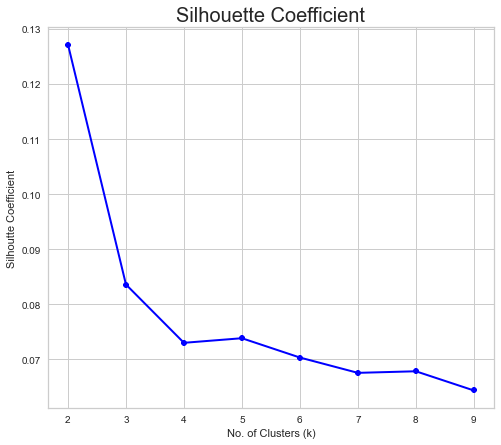

In [28]:
fig, ax = plt.subplots(figsize=(8,7))
ax = plt.plot(range(2,10),sil, linewidth=2, color="blue", marker ="8")
#plt.axvline(x=3, ls='--')
plt.ylabel('Silhoutte Coefficient')
plt.xlabel('No. of Clusters (k)')
plt.title('Silhouette Coefficient', fontsize = 20)
plt.show()

In [29]:
kms = KMeans(n_clusters=3, init='k-means++')
kms.fit(seg_X)

KMeans(n_clusters=3)

In [30]:
clusters = seg_X.copy();
clusters['Cluster_Prediction'] = kms.fit_predict(seg_X)
clusters

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Cluster_Prediction
0,0.603081,0.172444,0.009943,-0.320547,1.679864,1.272827,-0.386157,1.170641,-0.386157,-0.113211,0.141913,-0.110085,1.179064,0.157285,1.130766,1.266256,-0.579164,1.266256,-0.426346,1
1,0.332212,0.931255,0.009943,-0.320547,-0.595286,-0.554002,1.275476,0.714199,1.275476,-1.601622,0.495152,-1.603208,-0.849708,0.207248,-0.799033,0.712864,0.232927,0.712864,-1.188960,2
2,0.603081,-0.409312,-1.398717,3.119667,-0.595286,-0.554002,1.954830,-1.466583,1.954830,-2.015200,-0.615028,-2.052490,-0.078071,-0.542202,-0.079447,-1.353132,1.045017,-1.353132,0.336268,2
3,0.670798,-0.636955,0.009943,3.119667,-0.595286,-0.554002,-0.281470,0.663483,-0.281470,-1.138976,1.100705,-1.135094,-0.307920,1.056625,-0.289715,-0.061884,-0.579164,-0.061884,1.098882,2
4,-0.480393,0.526556,1.418604,-0.320547,1.679864,1.090144,0.780995,-0.604414,0.780995,2.073842,0.394227,2.114803,0.271394,0.906735,0.252310,-1.021097,1.045017,-1.021097,1.098882,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,-0.006373,-0.434606,0.009943,-0.320547,-0.595286,-0.554002,0.157326,-1.517299,0.157326,0.963959,-0.615028,0.957969,0.297193,-1.041836,0.275673,0.011901,0.638972,0.011901,-1.188960,0
4246,1.551121,-0.687543,-1.398717,-0.320547,-0.595286,-0.554002,-0.060958,-0.553698,-0.060958,-1.452080,-0.917805,-1.447170,-0.324338,-0.542202,-0.303733,0.454615,0.638972,0.454615,1.098882,2
4247,0.061344,-0.636955,-1.398717,-0.320547,-0.595286,-0.554002,-0.199056,0.054892,-0.199056,-0.164616,1.302557,-0.163891,-1.501730,0.207248,-1.481237,-1.242454,1.045017,-1.242454,-0.426346,0
4248,-1.022130,-1.269298,-1.398717,-0.320547,1.679864,2.551608,1.130696,1.373505,1.130696,0.510660,1.302557,0.505996,1.831086,0.806808,1.929786,-0.135670,0.232927,-0.135670,0.336268,1


In [31]:
clusters.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'Cluster_Prediction'],
      dtype='object')

In [32]:
count_samples = clusters['Cluster_Prediction'].value_counts()
print("Samples in cluster 1: ",count_samples[0])
print("Samples in cluster 2: ",count_samples[1])
print("Samples in cluster 3: ",count_samples[2])

Samples in cluster 1:  1613
Samples in cluster 2:  1100
Samples in cluster 3:  1537


In [33]:
numerical_var = [ 'account_length','number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'Cluster_Prediction']

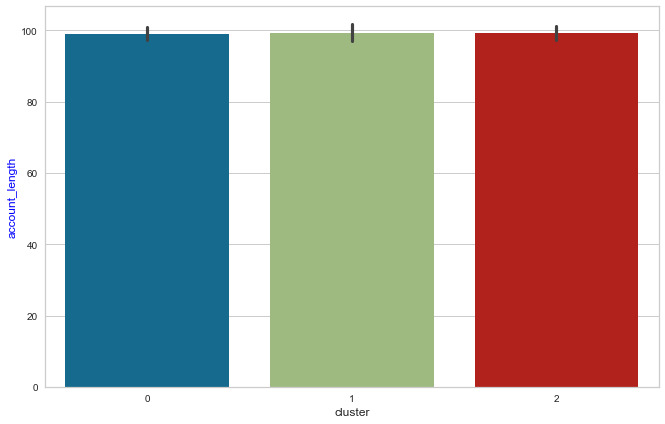

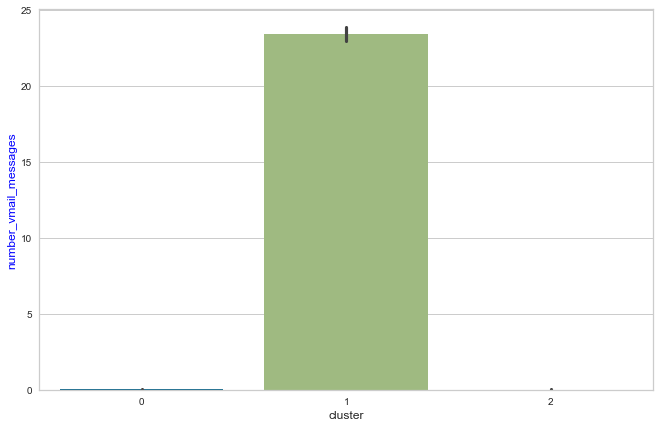

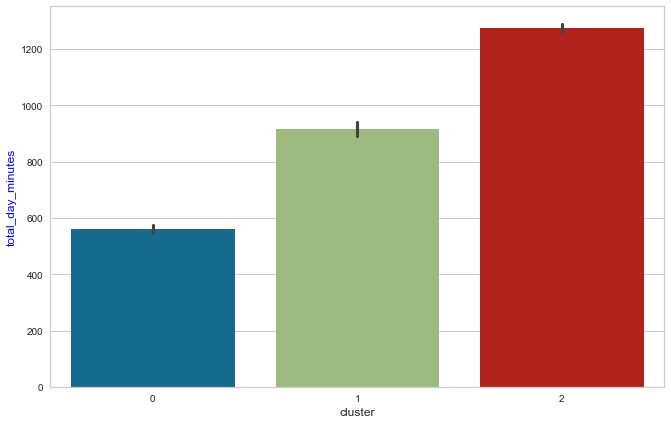

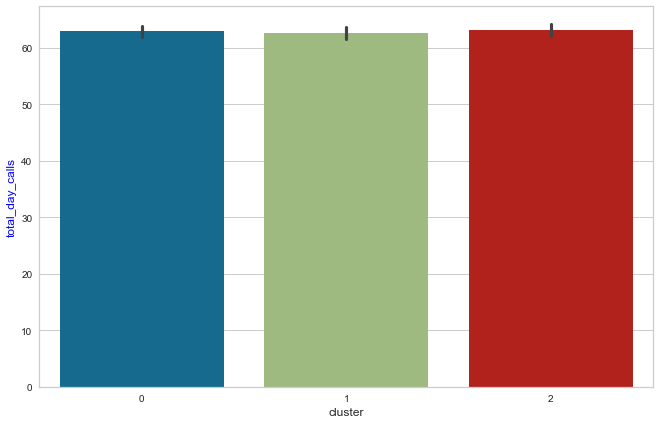

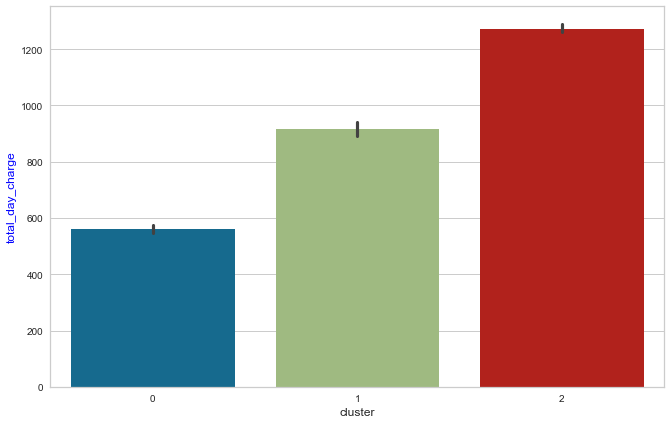

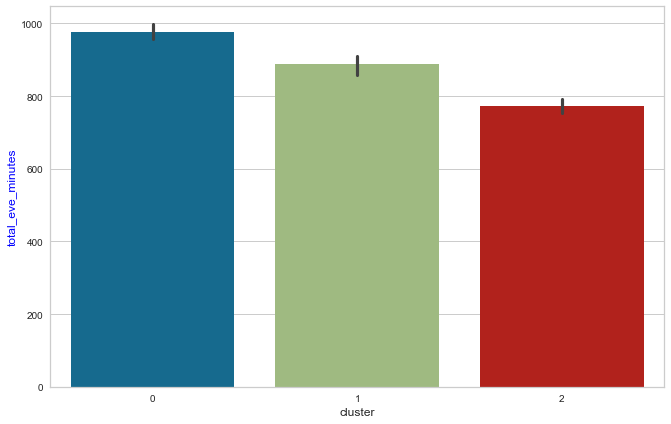

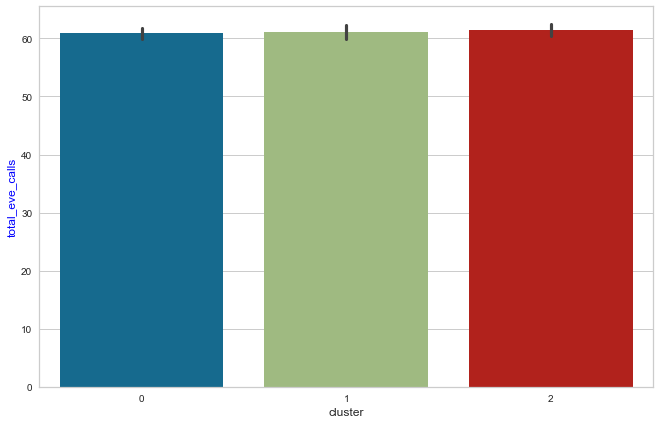

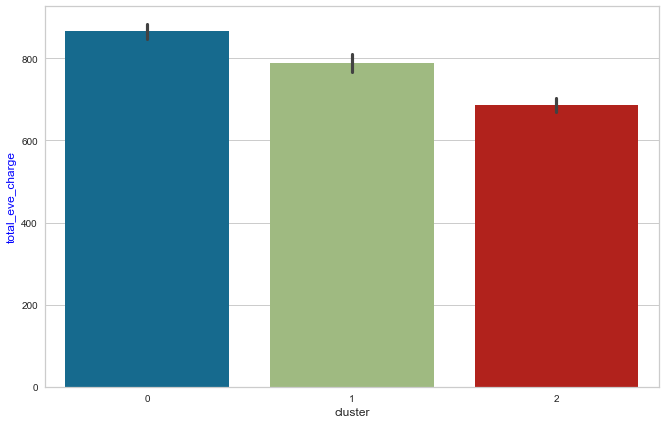

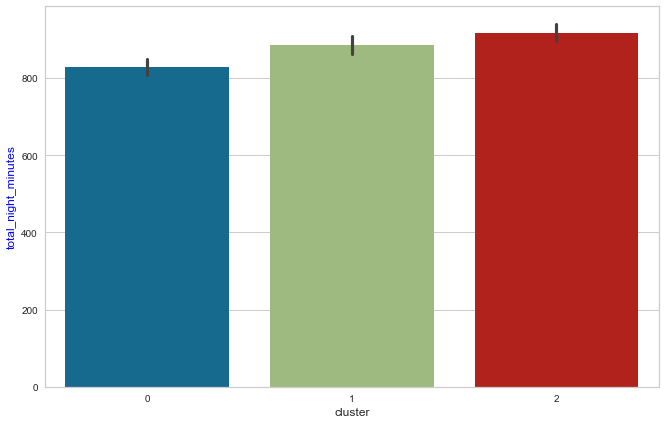

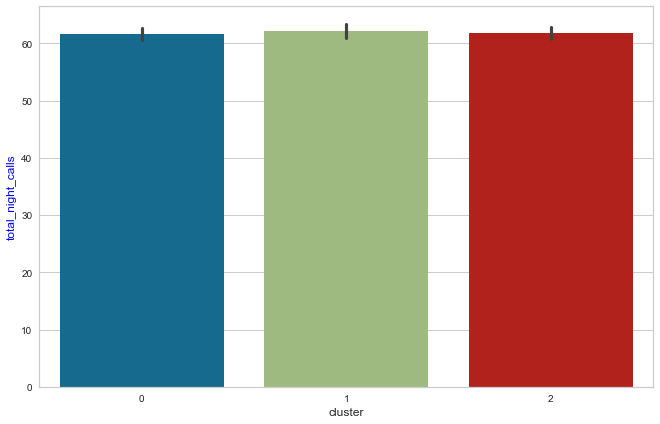

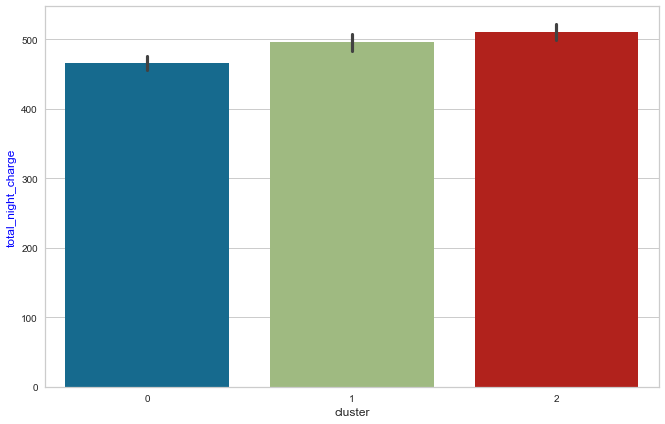

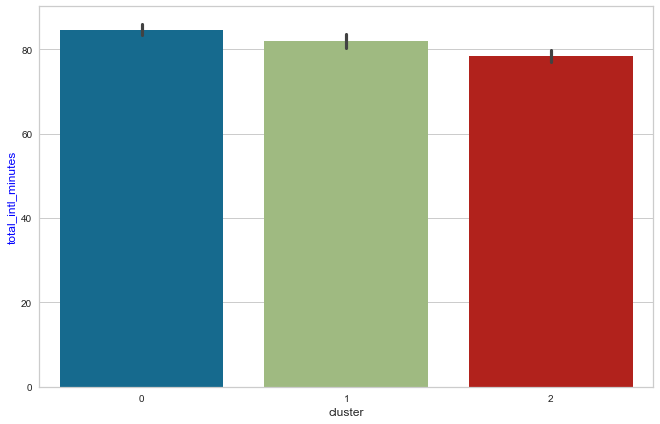

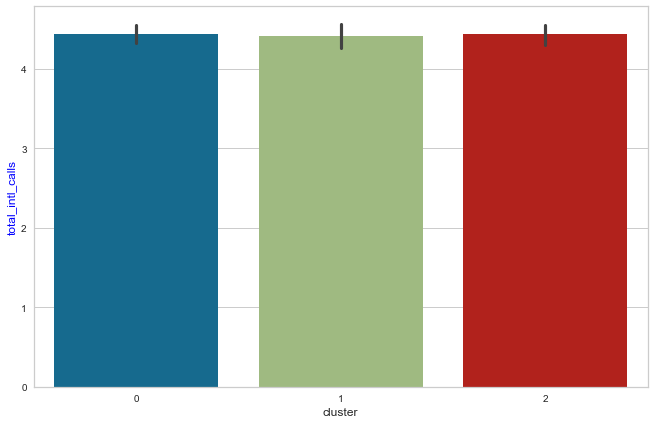

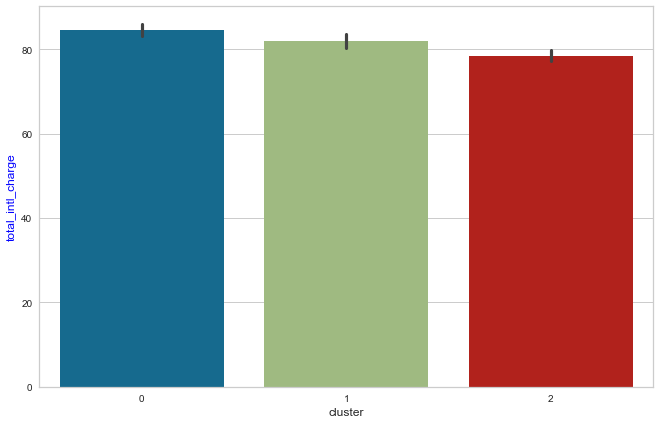

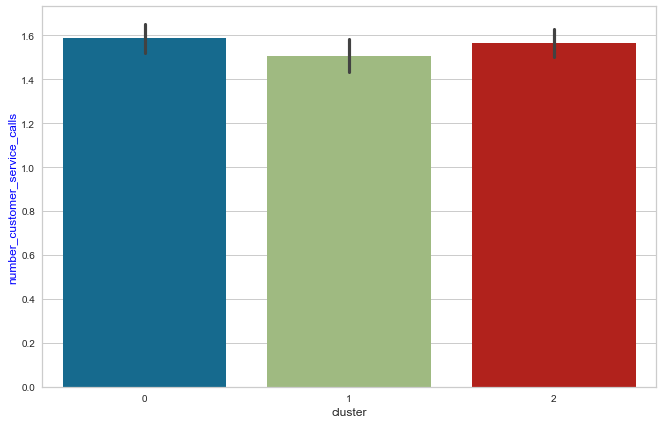

In [34]:
init_data['Cluster_Prediction'] = clusters['Cluster_Prediction']
temp = init_data.loc[:,numerical_var]

for i in range(len(numerical_var) - 1):
    fig,axs = plt.subplots(figsize=(11,7))
    ax = sns.barplot(x="Cluster_Prediction", y=numerical_var[i], data=temp, ax=axs)
    ax.set_xlabel("cluster", fontsize=12)
    ax.set_ylabel(numerical_var[i], fontsize=12, color="blue")

In [35]:
categorical_var = ['state', 'area_code', 'international_plan', 'voice_mail_plan']

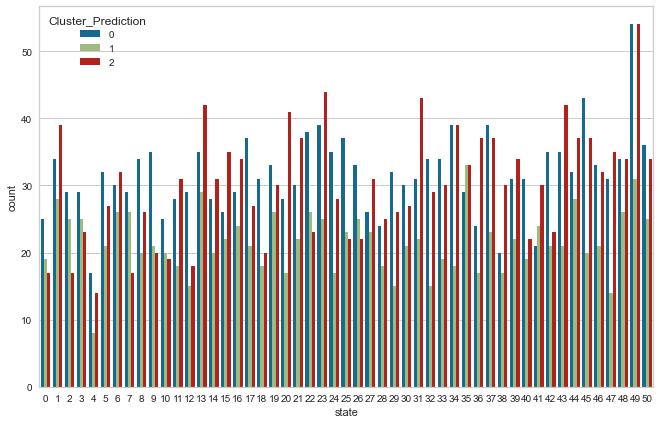

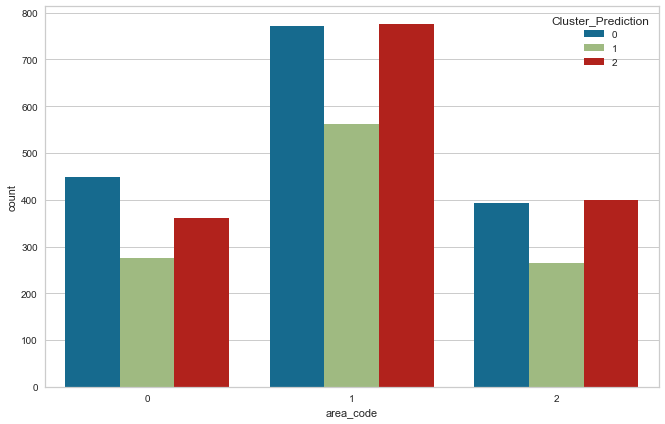

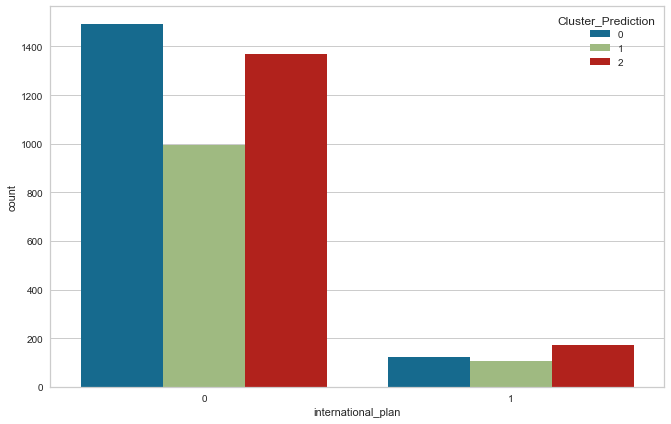

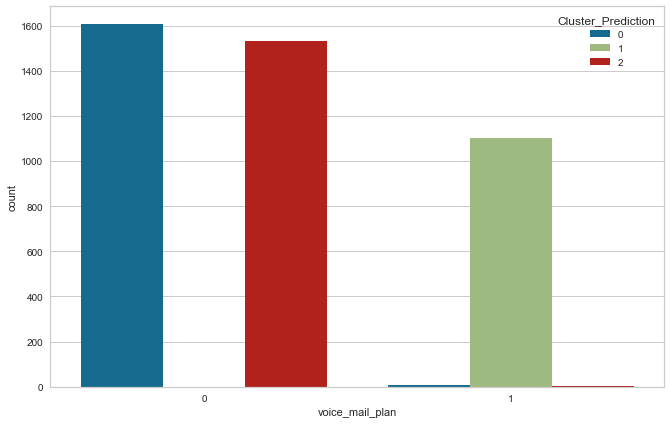

In [36]:
for col in categorical_var:
  fig = plt.figure(figsize=(11,7))
  sns.countplot(x=init_data[col],hue=clusters["Cluster_Prediction"])
  plt.show()

CATEGORICAL DATA:


AREA CODE: 415(1), 408(0),510(2)
INTERNATIONAL PLAN: NO(0),YES(1)
VOICE MAIL PLAN: YES(1),NO(0)





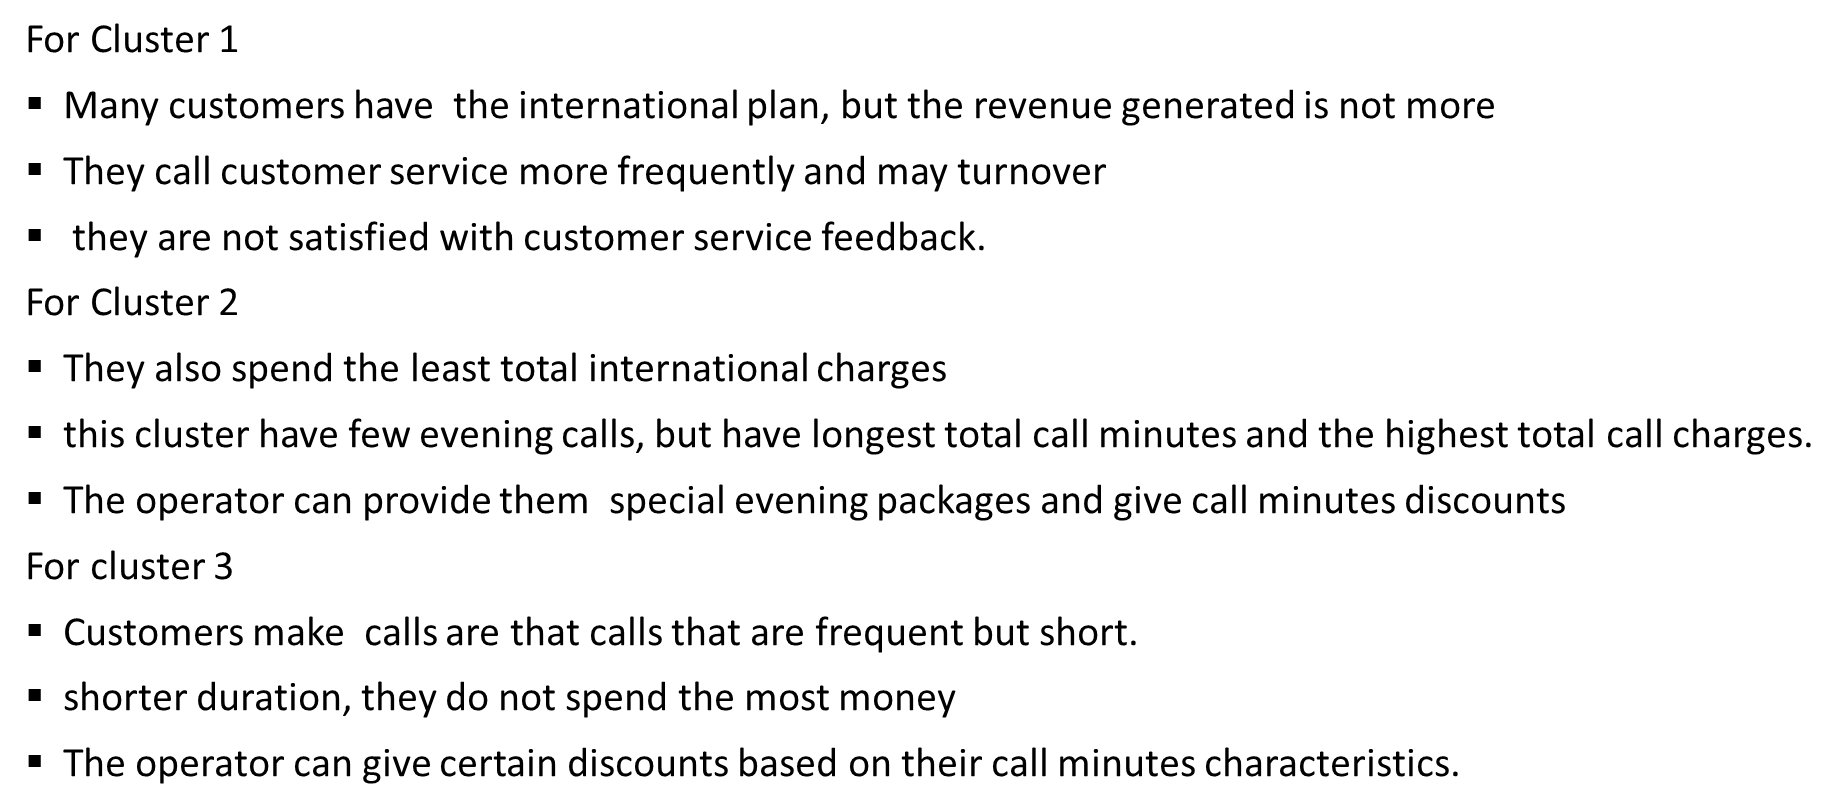